In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv('Processed_data.csv',index_col=0)

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
X=df.drop('strength',axis=1)
y=df['strength']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [6]:
model=Sequential([
    Dense(5000,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(1000,activation='relu'),
    Dense(1000,activation='relu'),
    Dense(500,activation='tanh'),
    Dense(1,activation='relu')])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              45000     
                                                                 
 dense_1 (Dense)             (None, 1000)              5001000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 1)                 501       
                                                                 
Total params: 6,548,001
Trainable params: 6,548,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='Adam',loss='mse',metrics=['mse'])

In [9]:
history=model.fit(X_train,y_train,batch_size=100,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
8/8 [==============================] - 1s 88ms/step - loss: 752.8855 - mse: 752.8855 - val_loss: 518.1990 - val_mse: 518.1990
Epoch 2/30
8/8 [==============================] - 0s 57ms/step - loss: 455.9912 - mse: 455.9912 - val_loss: 429.3264 - val_mse: 429.3264
Epoch 3/30
8/8 [==============================] - 0s 56ms/step - loss: 374.5527 - mse: 374.5527 - val_loss: 359.0466 - val_mse: 359.0466
Epoch 4/30
8/8 [==============================] - 0s 54ms/step - loss: 318.1571 - mse: 318.1571 - val_loss: 317.3711 - val_mse: 317.3711
Epoch 5/30
8/8 [==============================] - 1s 67ms/step - loss: 286.0670 - mse: 286.0670 - val_loss: 297.0671 - val_mse: 297.0671
Epoch 6/30
8/8 [==============================] - 1s 76ms/step - loss: 272.1331 - mse: 272.1331 - val_loss: 287.9056 - val_mse: 287.9056
Epoch 7/30
8/8 [==============================] - 0s 54ms/step - loss: 266.5294 - mse: 266.5294 - val_loss: 284.5991 - val_mse: 284.5991
Epoch 8/30
8/8 [=========================

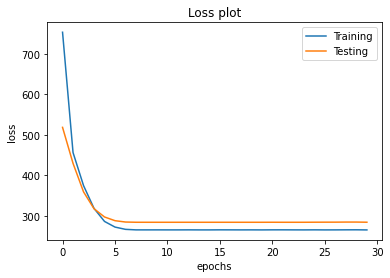

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss plot')
plt.legend(['Training','Testing'])

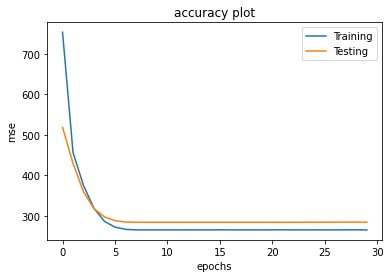

In [11]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('epochs')
plt.ylabel('mse')
plt.title('accuracy plot')
plt.legend(['Training','Testing'])